In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets-main/adult.csv/adult.csv")

# Data Mining

In [ ]:
data = data.replace('?', np.nan)

In [ ]:
data = data.drop(['education','fnlwgt'],axis=1)

In [ ]:
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
columnas_con_nan = ['workclass', 'occupation', 'native.country']

In [ ]:
for col in columnas_con_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
data.shape

(32561, 13)

# Visualización de los datos
Visualización de los datos con las librerías Seaborn y PyPlot

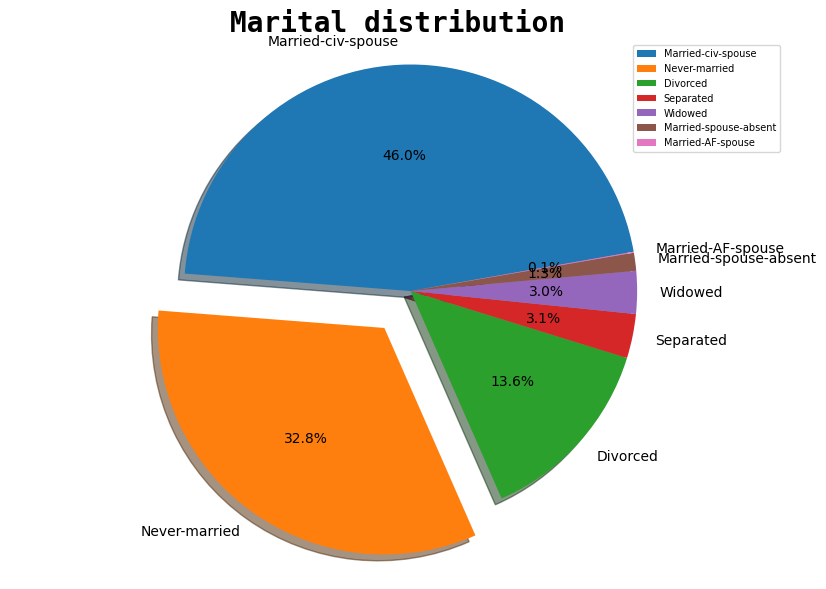

In [ ]:
# Diagrama de pastel de la característica Estado Civil
marital = data['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

<ipython-input-35-4f47ae63085c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


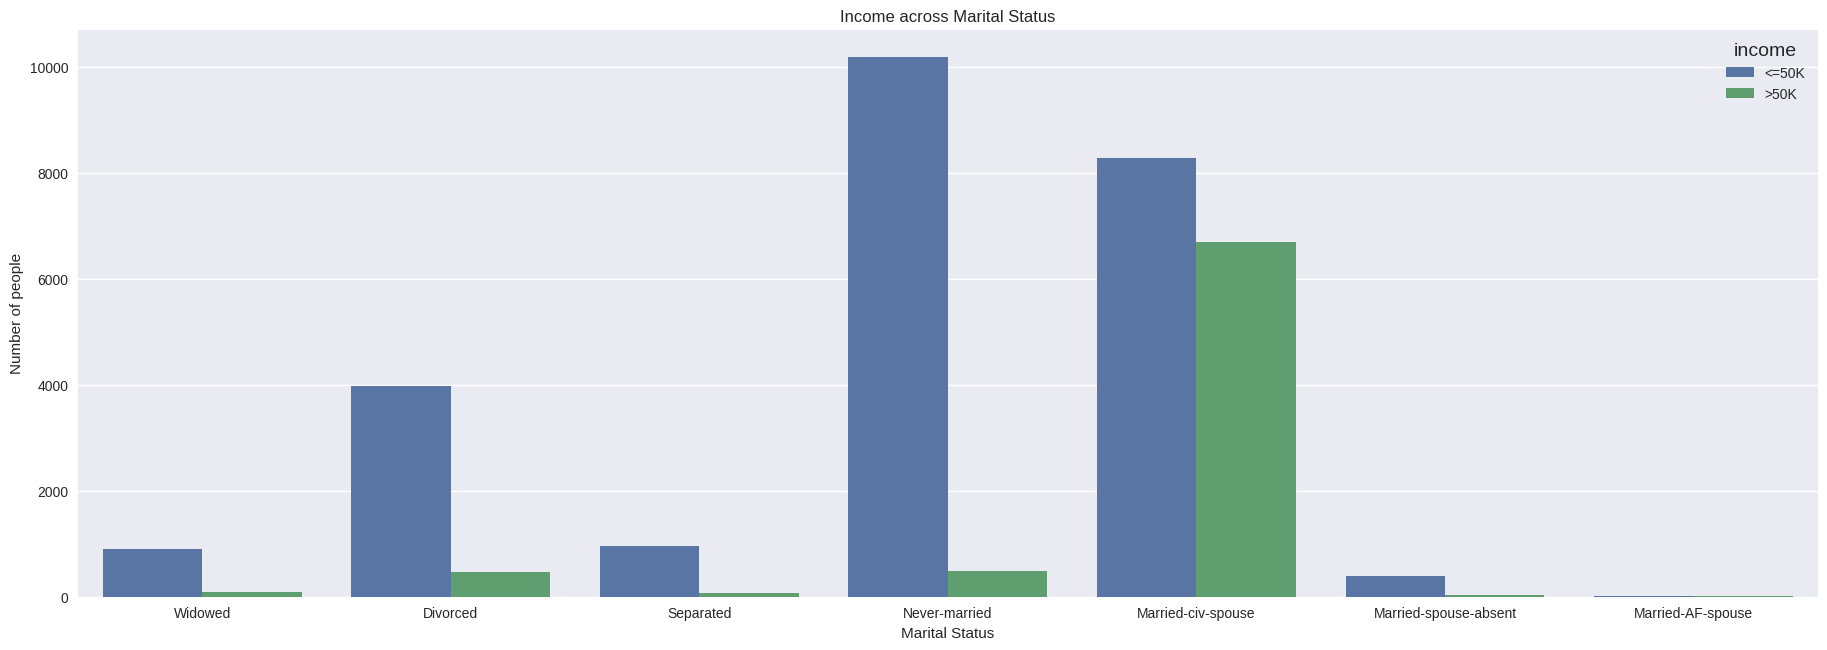

In [35]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data, x="marital.status", hue="income")
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.show()

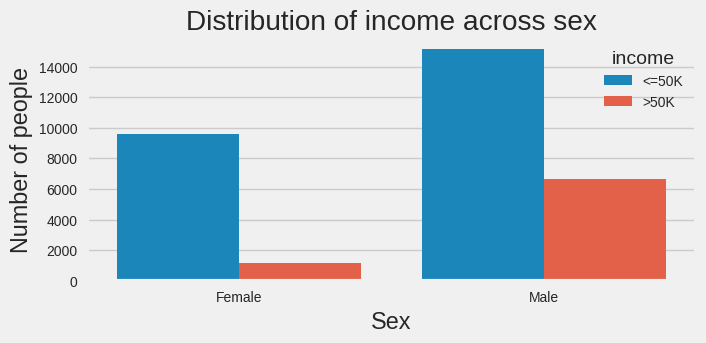

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(data, x="sex", hue='income')
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

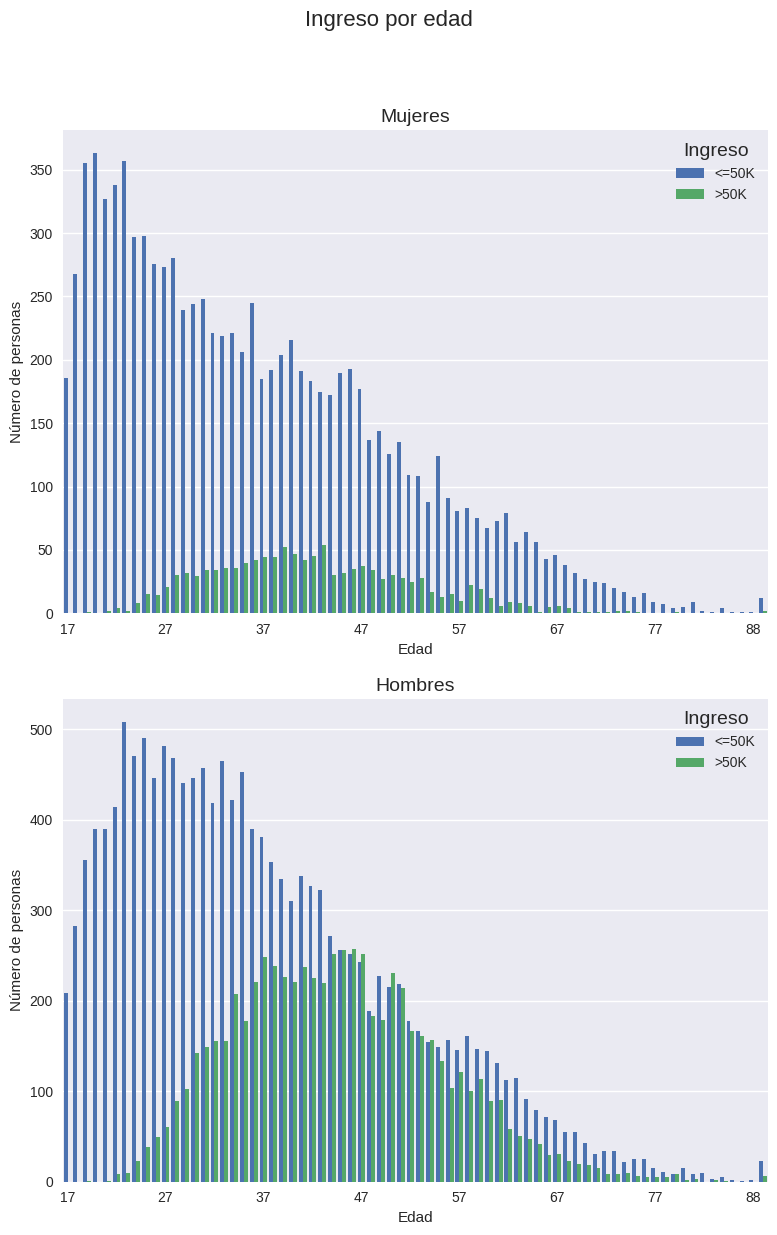

In [36]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))
# fig = plt.figure(figsize = (10,13));

# Initiate plot
sns.countplot(x = 'age', hue = 'income', data = data[data.sex=='Female'], saturation=1, ax=ax[0])
sns.countplot(x = 'age', hue = 'income', data = data[data.sex=='Male'], saturation=1, ax=ax[1])

# Add titles
ax[0].set_title('Mujeres', loc='center', fontsize = 14)
ax[1].set_title('Hombres', loc='center', fontsize = 14)

# Add labels
ax[0].set_xlabel("Edad")
ax[1].set_xlabel("Edad")
ax[0].set_ylabel("Número de personas")
ax[1].set_ylabel("Número de personas")

# Add x_axis ticks
new_ticks = [i.get_text() for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0, len(new_ticks), 10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0, len(new_ticks), 10))
ax[1].set_xticklabels(new_ticks[::10])

# Change legend location
ax[0].legend(loc=1, title='Ingreso')
ax[1].legend(loc=1, title='Ingreso')

# Set suptitle
fig.suptitle("Ingreso por edad", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

<ipython-input-42-b9004abfaa0a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


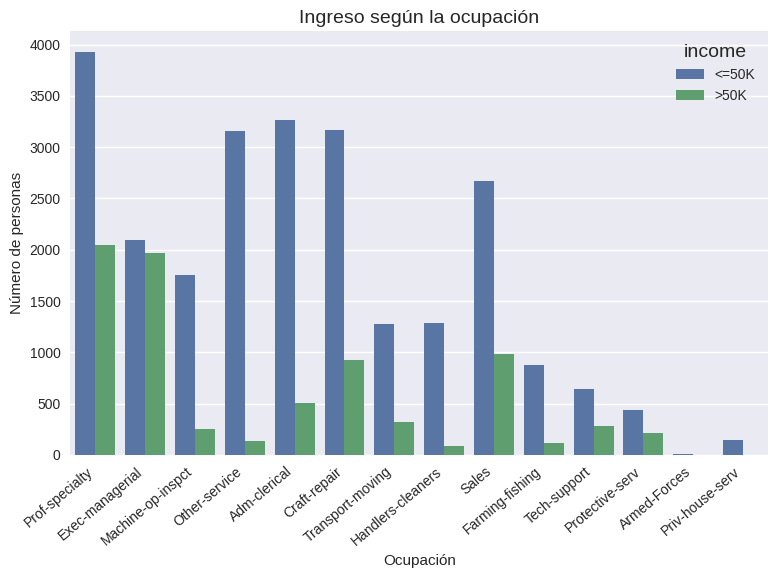

In [42]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = data, x = 'occupation', hue = 'income')
ax.set_title('Ingreso según la ocupación', fontsize = 14)
ax.set_xlabel("Ocupación")
ax.set_ylabel("Número de personas")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")



plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

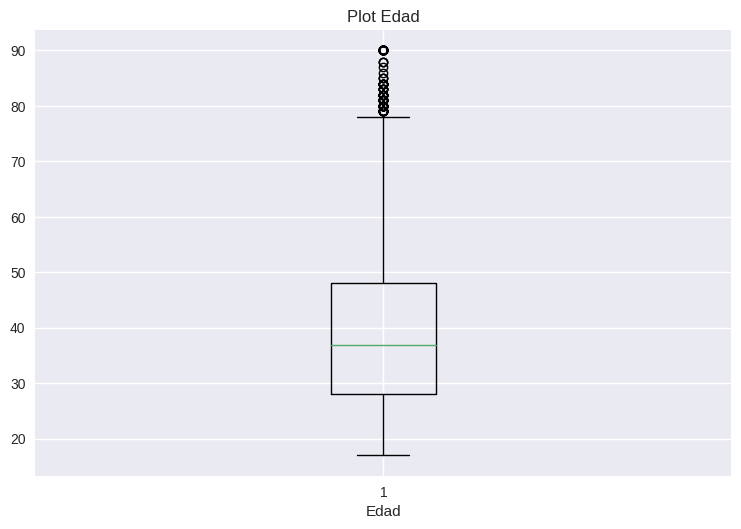

In [43]:
plt.boxplot(data.age)
plt.xlabel('Edad')
plt.title('Plot Edad')
plt.show

# Label Encoding


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

# Train Datasets

In [ ]:
X = data.drop('income', axis=1)
Y = data['income']

# Random Oversampling
Oversampling para poder conpensar el desbalanceo de clases que sufre el dataset y que empeora los resultados del modelo

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
ros.fit(X,Y)

In [ ]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

# Creación del modelo
Creación y ejecución del modelo Random Forest creado para este dataset, también se logra apreciar los scores de este modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

In [ ]:
forest.fit(X_train, Y_train)

In [ ]:
forest.score(X_test, Y_test)

In [ ]:
importancia_caracteristicas = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importancia_caracteristicas = pd.Series(importancia_caracteristicas)
importancia_caracteristicas.sort_values(ascending=False)
importancia_caracteristicas.head(50)

In [ ]:
Y_prediccion = forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_prediccion) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_prediccion) * 100, 2))